# Dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np

class Dataset():
    def __init__(self, n_items, config={}):
        'Initialization'
        default = {
            "seed":0,
            "size":(14,14),
            "channels":1,
            "square_size":(2,2)
        }
        config = {**default,**config}
        self.config = config
        self.n_items = n_items
        self.list_IDs, self.labels, self.seeds = self.__gen_init__()

    def __len__(self):
        'Denotes the total number of samples'
        return len(self.list_IDs)

    def __getitem__(self, index):
        'Generates one sample of data'
        # Select sample
        ID = self.list_IDs[index]

        # Load data and get label
        X, y = self.__gen_sample__(ID)
        return X, y
    
    def __gen_init__(self):
        'Generates the init data'
        ids = list(range(self.n_items))
        ids = {i:i for i in ids}
        lbs = {i:i for i in ids}
        seeds = np.random.uniform(size=self.n_items)
        seeds = {i:seeds[i] for i in ids}
        return ids, lbs, seeds

    def __gen_sample__(self, ID):
        'Generates a single sample'
        # generate size

        # generate y
        dh = np.random.randint(
            self.config["square_size"][0],
            self.config["square_size"][1]+1
        )
        dw = np.random.randint(
            self.config["square_size"][0],
            self.config["square_size"][1]+1
        )
        h, w = self.config["size"]
        px = int(dw + (w - 2*dw) * int(str(self.seeds[ID])[2:4])/100)
        py = int(dh + (h - 2*dh) * int(str(self.seeds[ID])[4:6])/100)
        # generate X
        X = np.random.rand(*[h, w])*0.9
        X[py:py+dh, px:px+dw] = 1.0
        y = [1, (px+dw/2)/w, (py+dh/2)/h, dw/w, dh/h]
        return X, y

def plot_image(X, y, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    # plot image
    ax.imshow(X, cmap="gray")
    ax.set_aspect(1)
    ax.set_yticks([i-0.5 for i in range(X.shape[0])], minor='True')
    ax.set_xticks([i-0.5 for i in range(X.shape[1])], minor='True')
    ax.yaxis.grid(True, which='minor')
    ax.xaxis.grid(True, which='minor')
    # plot y
    ax.axvline(x=y[1]*X.shape[1]-0.5, c="r")
    ax.axhline(y=y[2]*X.shape[0]-0.5, c="r")
    return ax

# How to use the dataset

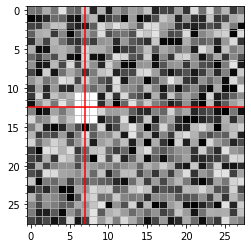

In [2]:
# create data generator
train_datagen = Dataset(n_items=1000,config={"seed": 1, "size":(28,28), "square_size":(2,4)})

# ask for a item
X,y = train_datagen[0]

# plot
plot_image(X, y)
plt.show()

# Create dataset for trainning and testing

In [3]:
train_datagen = Dataset(n_items=1000,config={"seed": 1, "size":(28,28), "square_size":(2,4)})
train_dataset = [train_datagen[i] for i in range(len(train_datagen))] # getting a list of each X,y pair
X_train, y_train = list(zip(*train_dataset)) # separating a list of tuples [(X1,y1),(X2,y2),..] into a two lists of lists [[X1,X2,..],[y1,y2,..]]
X_train = np.array([sample.reshape((28,28,1)) for sample in X_train]) # [transform x]
y_train = np.array([label[1:3] for label in y_train]) # [transform y]


test_datagen = Dataset(n_items=1000,config={"seed": 2, "size":(28,28), "square_size":(2,4)})
test_dataset = [test_datagen[i] for i in range(len(test_datagen))]
X_test, y_test = list(zip(*test_dataset))
X_test = np.array([sample.reshape((28,28,1)) for sample in X_test])
y_test = np.array([label[1:3] for label in y_test])



# Create and train tensorflow model

In [4]:
import tensorflow as tf

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(activation="relu", input_shape=(28,28,1), kernel_size=5, strides=1, padding="same", filters=20),
    tf.keras.layers.Conv2D(activation="relu", kernel_size=5, strides=1, padding="same", filters=20),
    tf.keras.layers.MaxPool2D(pool_size=[2,2], strides=2),
    tf.keras.layers.Conv2D(activation="relu", kernel_size=5, strides=1, padding="same", filters=20),
    tf.keras.layers.MaxPool2D(pool_size=[2,2], strides=2),
    tf.keras.layers.Conv2D(activation="sigmoid", kernel_size=5, strides=1, padding="same", filters=20),
    tf.keras.layers.MaxPool2D(pool_size=[2,2], strides=2),
    tf.keras.layers.Conv2D(activation="sigmoid", kernel_size=3, strides=1, padding="same", filters=2),
    tf.keras.layers.MaxPool2D(pool_size=[3,3], strides=3),
    
    tf.keras.layers.Flatten(),
])

In [6]:
sgd = tf.keras.optimizers.SGD(
    learning_rate=0.1,
    momentum=0.5)
model.compile(optimizer=sgd, loss='mse')

In [7]:
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), batch_size=12)

Train on 1000 samples, validate on 1000 samples
Epoch 1/200
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.0513 - val_loss: 0.0537
Epoch 2/200
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.0515 - val_loss: 0.0524
Epoch 3/200
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.0511 - val_loss: 0.0516
Epoch 4/200
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.0510 - val_loss: 0.0519
Epoch 5/200
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.0512 - val_loss: 0.0525
Epoch 6/200
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.0511 - val_loss: 0.0514
Epoch 7/200
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.0511 - val_loss: 0.0521
Epoch 8/200
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.0512 - val_loss: 0.0516
Epoch 9/200
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.0512 - val_loss: 0.0526
Epoch 1

Epoch 78/200
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.0013 - val_loss: 0.0018
Epoch 79/200
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.0013 - val_loss: 0.0018
Epoch 80/200
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.0012 - val_loss: 0.0018
Epoch 81/200
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.0012 - val_loss: 0.0019
Epoch 82/200
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.0012 - val_loss: 0.0017
Epoch 83/200
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.0011 - val_loss: 0.0017
Epoch 84/200
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.0011 - val_loss: 0.0016
Epoch 85/200
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.0011 - val_loss: 0.0016
Epoch 86/200
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.0011 - val_loss: 0.0016
Epoch 87/200
1000/1000 [======================

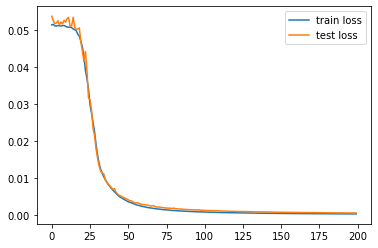

In [8]:
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="test loss")
plt.legend()
plt.show()

# use model

In [9]:
new_datagen = Dataset(n_items=1000,config={"seed": 3, "size":(28,28), "square_size":(2,4)})
new_dataset = [new_datagen[i] for i in range(len(new_datagen))]
X_new, y_new = list(zip(*new_dataset))
X_new = np.array([sample.reshape((28,28,1)) for sample in X_new])
y_new = np.array([label[1:3] for label in y_new])

[[0.19817933 0.3114392 ]]


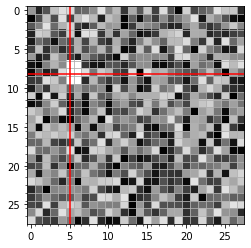

In [10]:
X_to_preduct = new_datagen[1][0]
prediction = model.predict(X_to_preduct.reshape(1,28,28,1))
y_to_plot = np.concatenate([[1],prediction[0],[0,0]])
print(prediction)
plot_image(X_to_preduct, y_to_plot)

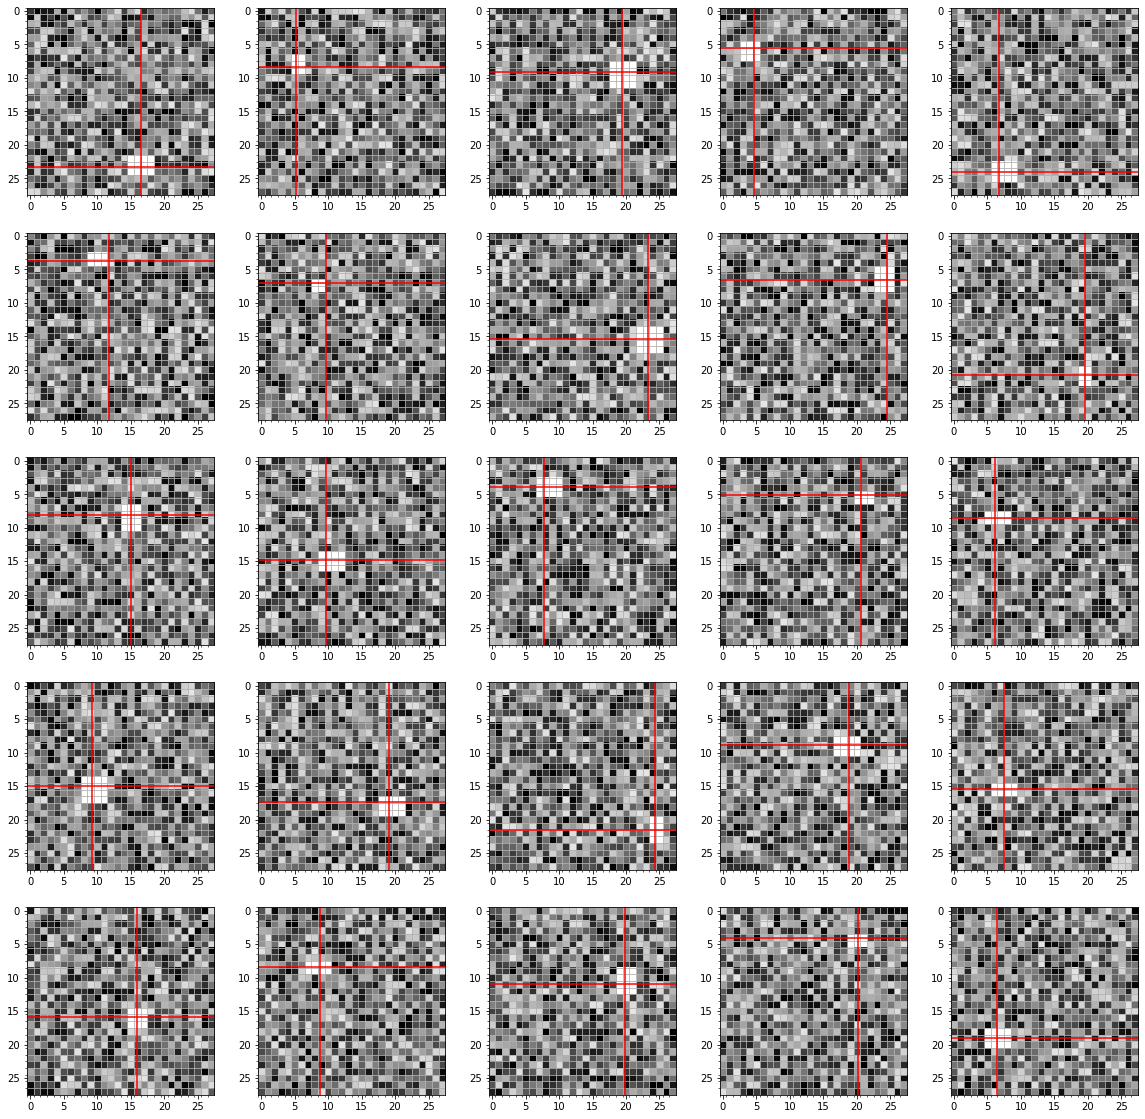

In [11]:
rows = 5
cols = 5
fig, axes = plt.subplots(rows, cols, figsize=(20,20))
for row in range(rows):
    for col in range(cols):
        n = row*5+col
        
        X_to_preduct = new_datagen[n][0]
        prediction = model.predict(X_to_preduct.reshape(1,28,28,1))
        y_to_plot = np.concatenate([[1],prediction[0],[0,0]])
        
        plot_image(X_to_preduct, y_to_plot, axes[row,col])
plt.show()